# Predicting Heart Diseases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read and display data to get an insight into the data.

df=pd.read_csv(r"C:\Users\aahil\OneDrive\Desktop\ML lms portal\HeartDisease.csv")
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Dimensions of the data

In [4]:
df.shape

(303, 14)

Check data types

In [5]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

* **From the above output, it is clear to see that the data type of variables 'old_peak' is 'float64', and rest of the variables are identified as 'int64'**

* **But as per data attribute information above we have, 'gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia' variables are categorical, which are wrongly interpreted as int64, so we convert these variables' data type to 'object'.**

In [6]:
# Changing the incorrect data type as per data attribute information
for x in df[['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']]:
    
    df[x] = df[x].astype('object')

In [7]:
df.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

Now we have all the variables with corrected data type as required.

Now we check for summary statistics of all the variables.

1. For numerical variables, use the describe()
2. For categorical variables, use the describe(include=object)

In [8]:
# summary of the numerical variable

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


In [9]:
# summary of the categorical variable
df.describe(include = object).T

,count,unique,top,freq
gender,303,2,1,207
chest_pain,303,4,0,143
fasting_blood_sugar,303,2,0,258
rest_ecg,303,3,1,152
exer_angina,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thalassemia,303,4,2,166


1. Distribution of numeric independent variables.

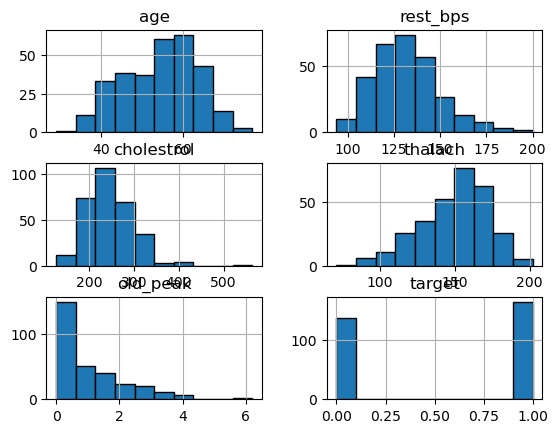

In [10]:
# the hist() function considers the numeric variables only, by default
    
df.hist( edgecolor='black')
plt.show()

* **It can be seen that the variable 'old_peak' is right-skewed and variables 'cholestrol' and 'rest_bps' have slight right skew, but not a very long right tail. They are almost near normally distrubuted. Only the variable 'thalach' is slightly left-skewed.**
* **The variable which is near normally distributed is 'age'.**


2. Distribution of categoric independent variables.

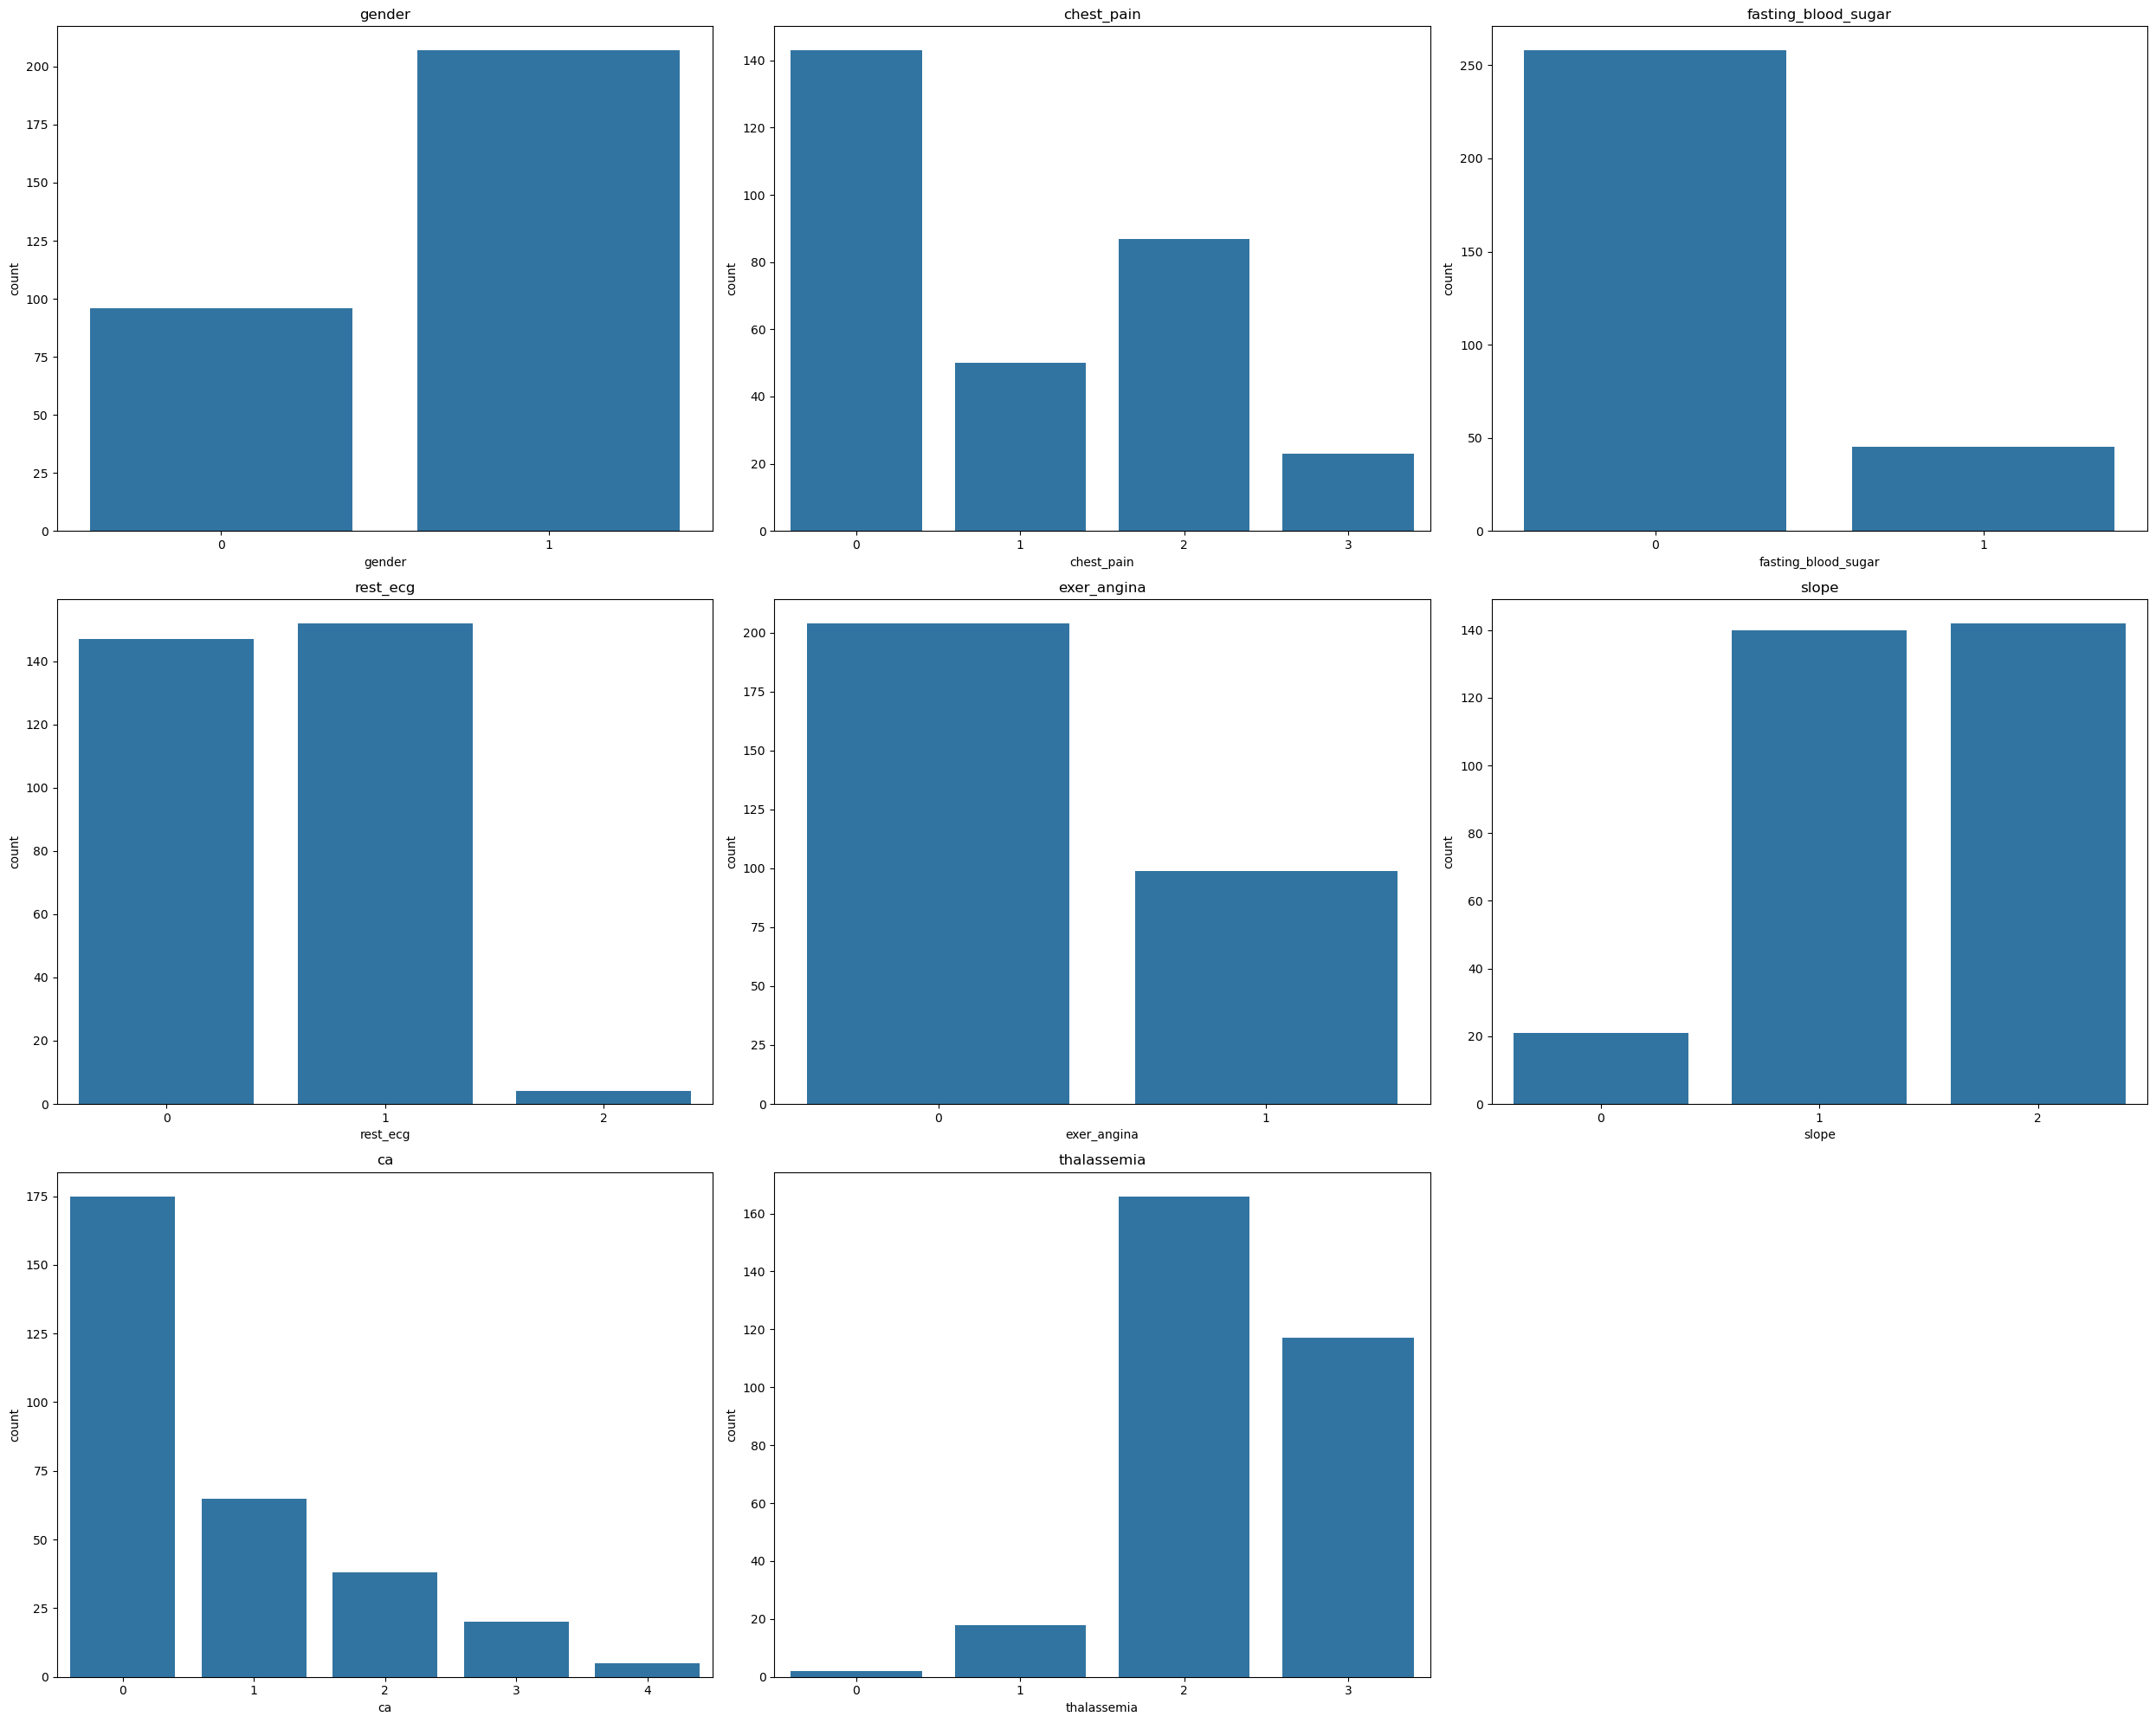

In [11]:
# Identifying categorical columns
categorical = []
for column in df:
    if df[column].dtype == 'object':
        categorical.append(column)

# Creating a grid of count plots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=df[variable], ax=subplot)
    subplot.set_title(variable)

# Hide any unused subplots
for i in range(len(categorical), 9):
    fig.delaxes(ax.flatten()[i])

# Display the plot
plt.tight_layout()
plt.show()


* **The variable 'ca' has 5 categories, variable 'chest_pain' and 'thalassemia' have 4 categories each, variables 'rest_ecg' and 'slope' have 3 categories each whereas the remaining variables have only two categories.**

3. Distribution of dependent (target) variable.

In [12]:
# Count the occurrences of each class in the 'heart_disease' column
heart_disease_counts = df['target'].value_counts()
heart_disease_counts

target
1    165
0    138
Name: count, dtype: int64

* **There are a total of 138 patients who do not have the disease, and 165 patients are affected by the Heart disease.**
* **We can also infer thatit's a balanced dataset between the two classes of the target variable.**

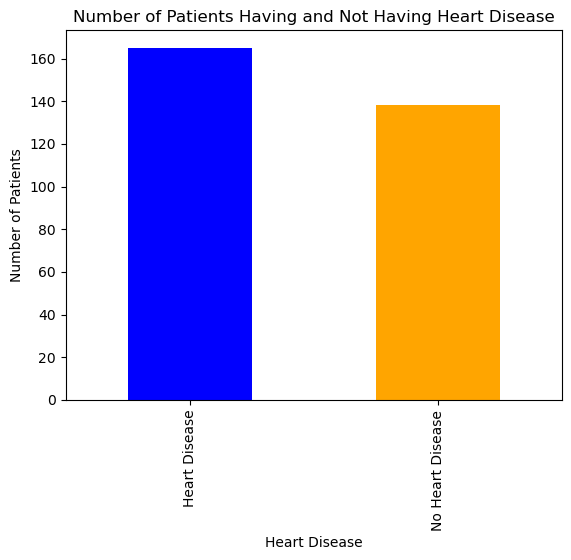

In [13]:
# To visualize the number of patients having a heart disease and not having a heart disease

# Create a bar plot
heart_disease_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients')
plt.title('Number of Patients Having and Not Having Heart Disease')
plt.xticks(ticks=[1, 0], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

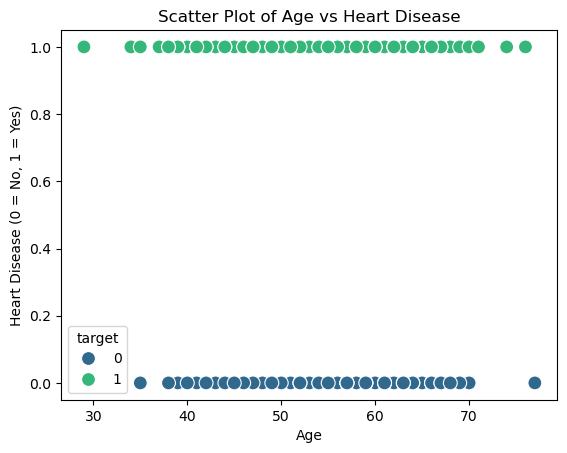

In [14]:
# Visualize the age and whether a patient has disease or not

sns.scatterplot(x='age', y='target', data=df, hue='target', palette='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.title('Scatter Plot of Age vs Heart Disease')
plt.show()

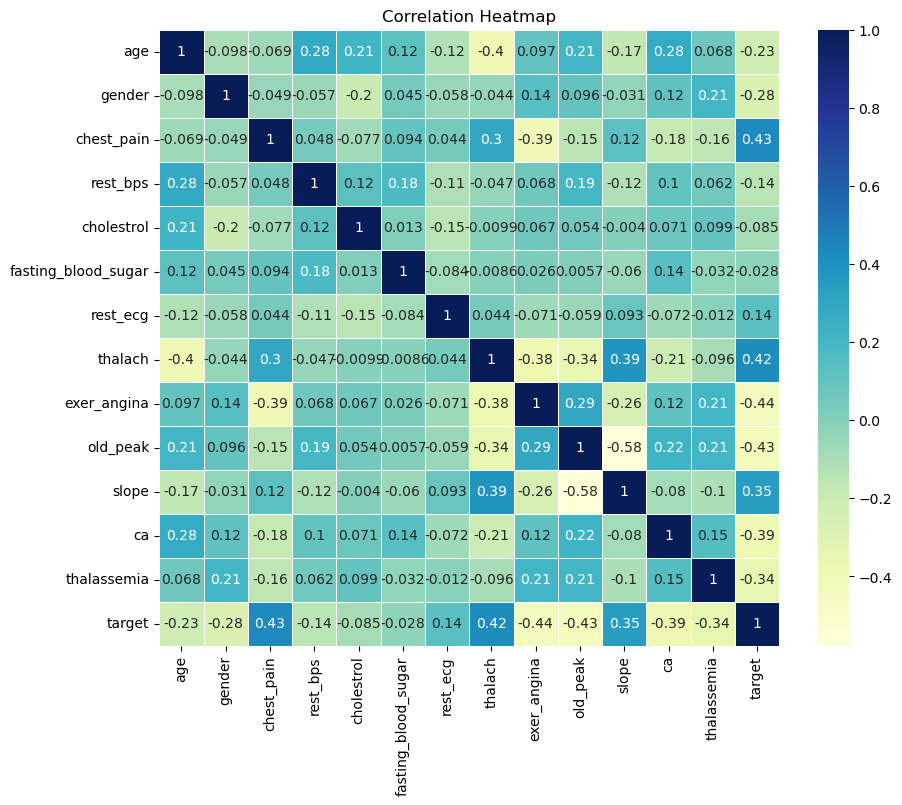

In [15]:
# Visualize correlation between features using a heat map
# plt.figure(figsize=(20, 16))

corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* **From the above heatmap, it can seen that the variables are not highly correlated with each other since all the correlation coefficients are less than close to 0.5. The maximum positive correlation is 0.39 between slope and thalach. Variable 'thalach' has a moderate negative correlation with variables 'age' (-0.4) and 'old_peak'(-0.34). More or less, it can be concluded that there is no multicollinearity in the data**

Outlier Detection

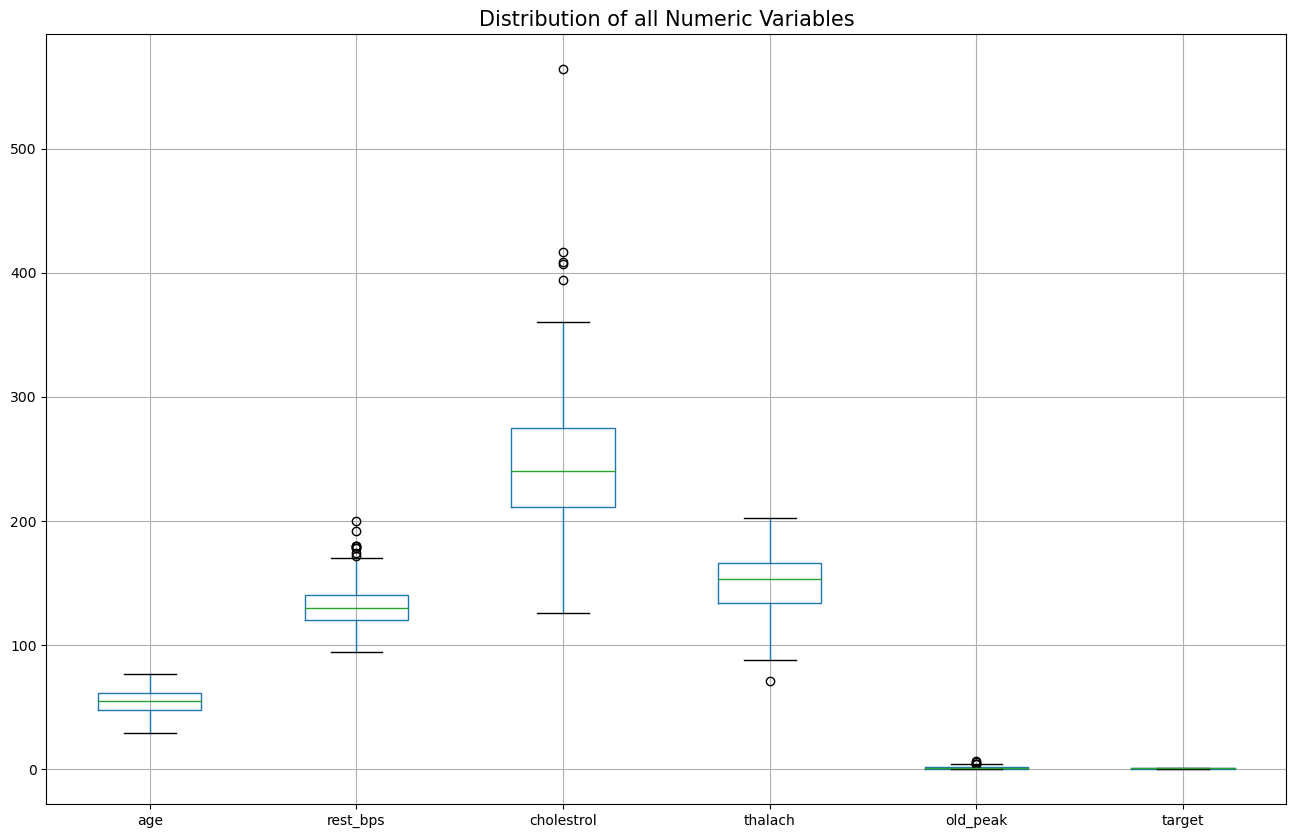

In [16]:
plt.figure(figsize=(16,10))
# plot a boxplot to visualize the outliers in all the numeric variables

df.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.show()

* **Notice that the variables 'age' , 'old_peak' has a quite small range as compared to the other variables. Thus, it is difficult to see the outliers for these variables. So, we plot the boxplot only for the variables 'age', 'old_peak'**

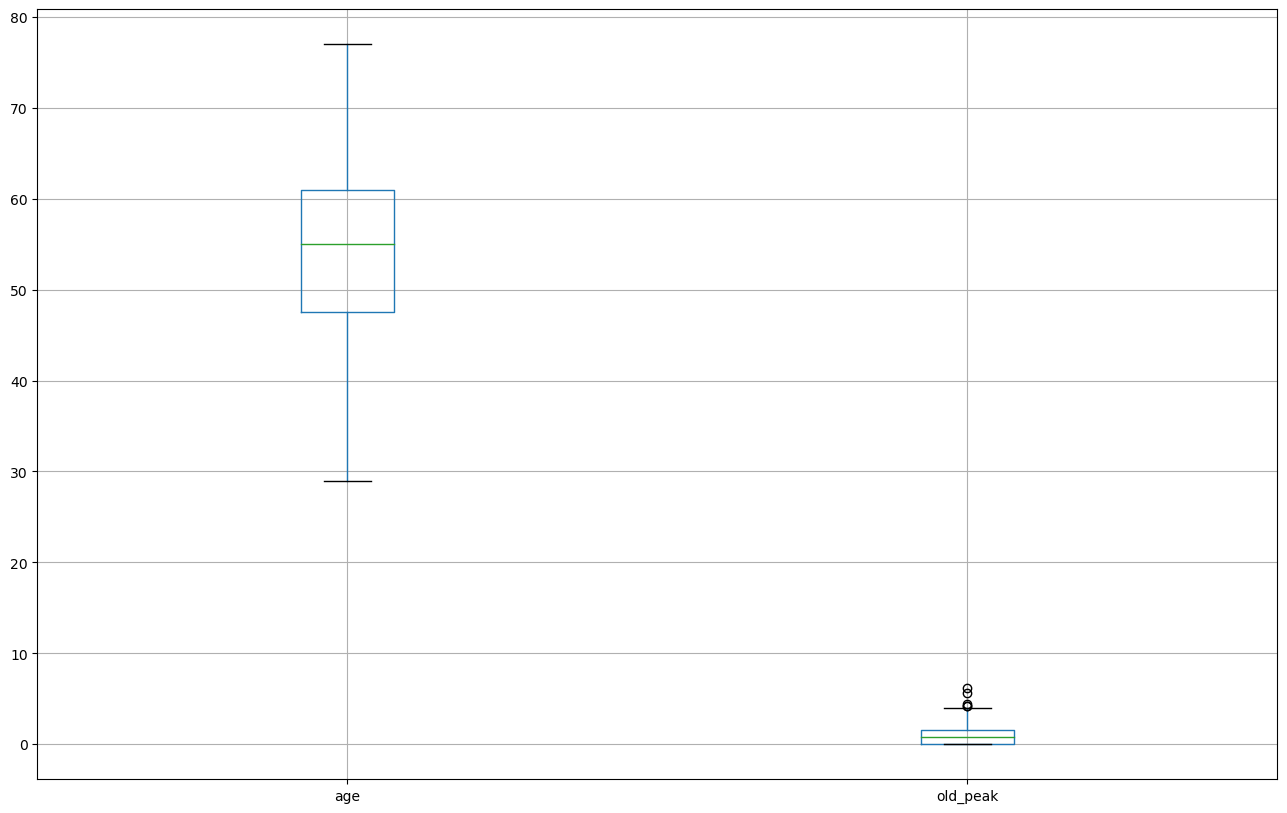

In [17]:
plt.figure(figsize=(16,10))
# Plotting boxplots for all numeric columns
x = [ 'age','old_peak']
df[x].boxplot()
plt.show()

* **From the above plot, we notice that for the variables 'rest_bps', 'cholestrol','thalach' and 'old_peak' there are points above the upper extreme or below the lower extreme - these are outliers in the data which are needed to be handled**

Removing Outliers Using IQR method

In [18]:
# Function to remove outliers using IQR

for x in df.columns:
    if df[x].dtype != 'object':
        Q1 = df[x].quantile(0.25)
        Q3 = df[x].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[x] >= lower_bound) & (df[x] <= upper_bound)]    

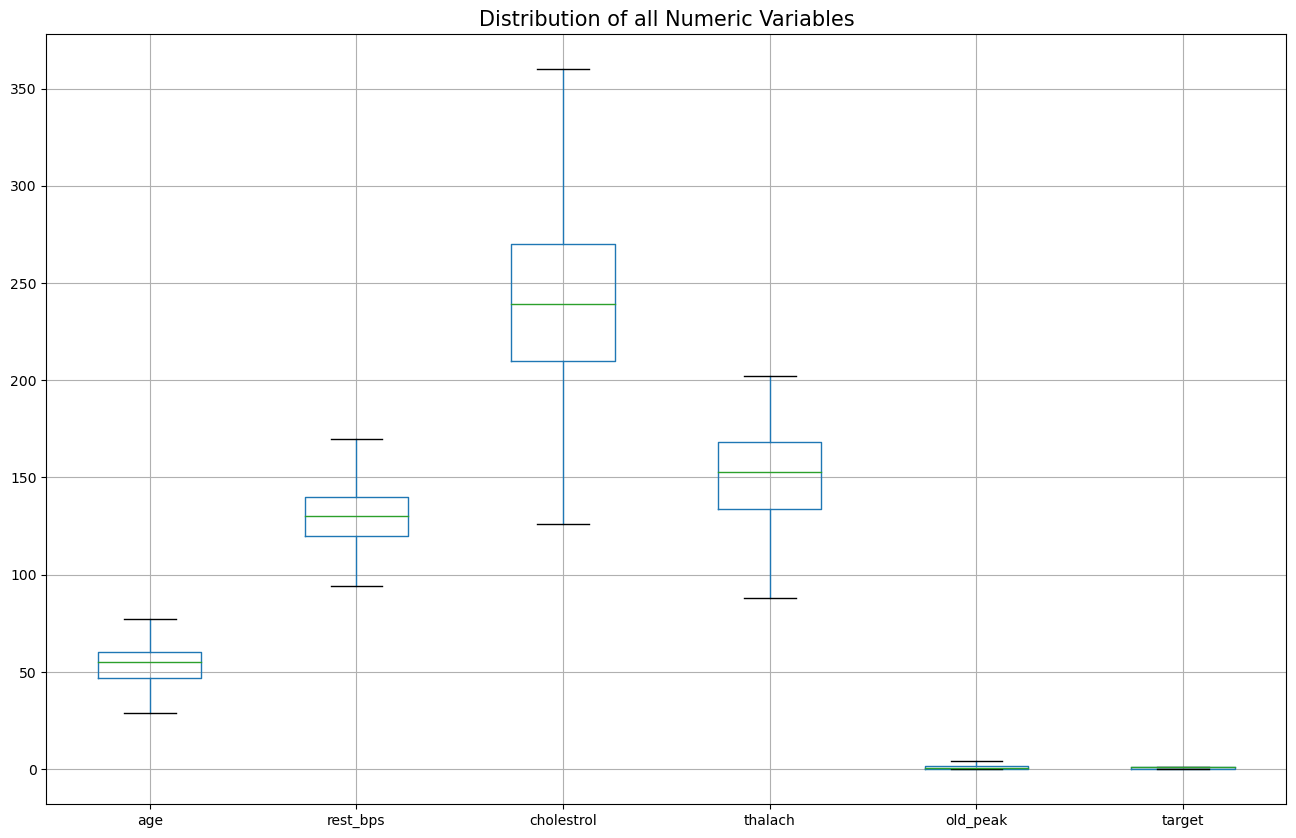

In [19]:
# To confirm that the outliers have been removed; let us visualize the boxplot again.

plt.figure(figsize=(16,10))
df.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.show()

* **Observing the range of the boxplot, we say that the outliers are removed from the original data**



* **A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed.**

In [20]:
# check the shape of the data after removal of outliers 
df.shape

(284, 14)

* **The output also confirms the reduction in the number of rows. Thus we may say that the potential outliers have been removed**

Handling Missing Values

In [21]:
Total = df.isnull().sum().sort_values(ascending = False)

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
age,0,0.0
gender,0,0.0
chest_pain,0,0.0
rest_bps,0,0.0
cholestrol,0,0.0
fasting_blood_sugar,0,0.0
rest_ecg,0,0.0
thalach,0,0.0
exer_angina,0,0.0
old_peak,0,0.0


* **The above output shows that there are no missing values in the data**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  284 non-null    int64  
 1   gender               284 non-null    object 
 2   chest_pain           284 non-null    object 
 3   rest_bps             284 non-null    int64  
 4   cholestrol           284 non-null    int64  
 5   fasting_blood_sugar  284 non-null    object 
 6   rest_ecg             284 non-null    object 
 7   thalach              284 non-null    int64  
 8   exer_angina          284 non-null    object 
 9   old_peak             284 non-null    float64
 10  slope                284 non-null    object 
 11  ca                   284 non-null    object 
 12  thalassemia          284 non-null    object 
 13  target               284 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


In [23]:
# use 'for' loop to change the data type of variables 
for col in ['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']:
     
    # use .astype() to change the data type
    df[col] = df[col].astype('int64')

* **Now we have all the variables with corrected data type as required**

Build a Model

Define a function to plot the confusion matrix.

In [24]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

Define a function to plot the ROC curve.

In [25]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Heart Disease Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

Create a generalized function to create a dataframe containing the scores for the models.


In [39]:
import pandas as pd
from sklearn import metrics
# Create an empty DataFrame to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

# Compile the required information in a user-defined function 
def update_score_card(model_name):
    global score_card
    global y_test, y_pred, y_pred_prob

    # Create a dictionary with the scores
    scores = {
        'Model': model_name,
        'AUC Score': roc_auc_score(y_test, y_pred_prob),
        'Precision Score': metrics.precision_score(y_test, y_pred),
        'Recall Score': metrics.recall_score(y_test, y_pred),
        'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
        'Kappa Score': cohen_kappa_score(y_test, y_pred),
        'f1-score': metrics.f1_score(y_test, y_pred)
    }

    # Convert the dictionary to a DataFrame
    scores_df = pd.DataFrame([scores])
    
    # Drop any empty or all-NA columns from both score_card and scores_df
    score_card.dropna(axis=1, how='all', inplace=True)
    scores_df.dropna(axis=1, how='all', inplace=True)

    # Append the results to the DataFrame 'score_card' using pd.concat
    score_card = pd.concat([score_card, scores_df], ignore_index=True)

    return score_card

In [27]:
X=df.drop(columns=['target'])
y=df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

# Build the model

To build the decision tree, we used the criterion of 'entropy'. Entropy is one of the criteria used to build the decision tree. It calculates the homogeneity of the sample. The entropy is zero if the sample is completely homogeneous, and it is equal to 1 if the sample is equally divided.

We build the decision tree on the unscaled features.

In [28]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree_model = decision_tree.fit(X_train, y_train)

Plot the decision tree

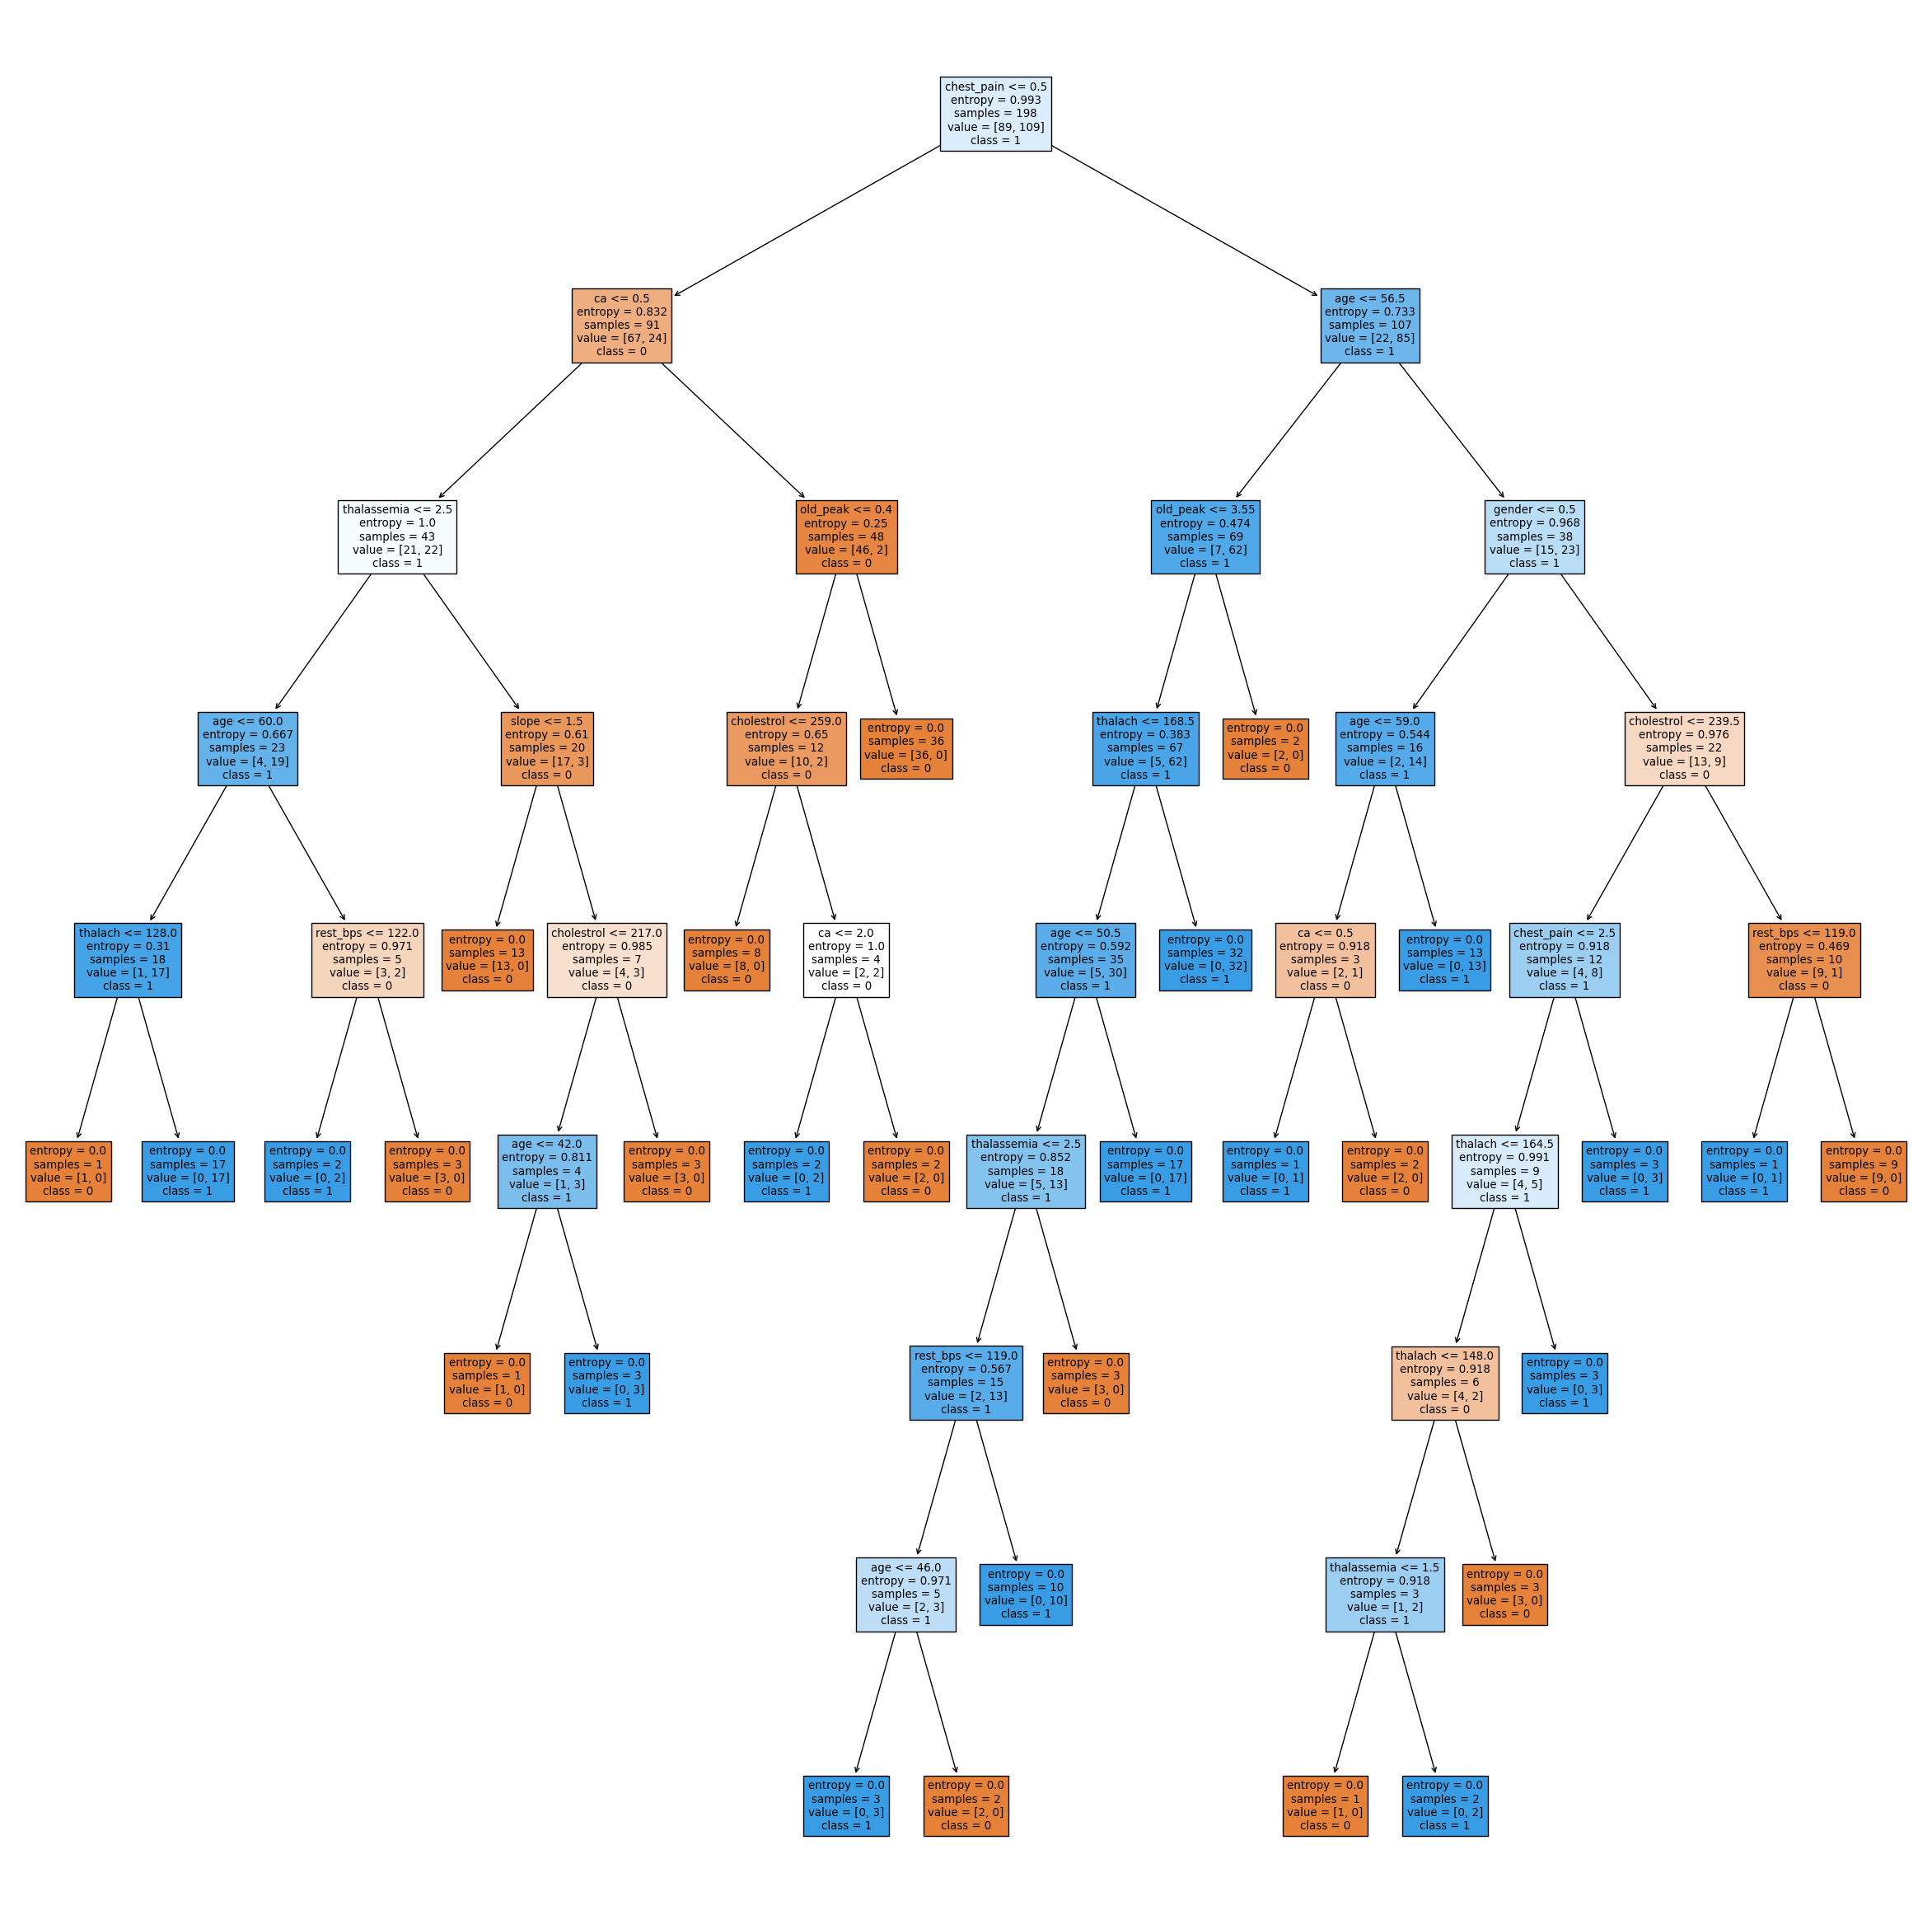

In [29]:
# save the column names in 'labels'
lables = X_train.columns
from sklearn import tree

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_model, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

In [30]:
# predict the class labels using 'X_test'
y_pred = decision_tree_model.predict(X_test)

In [31]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_model.predict_proba(X_test)[:,1]
y_pred_prob

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       0.])

In [33]:
from sklearn.metrics import *

dt_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {dt_accuracy:.4f}')

cm =confusion_matrix(y_test, y_pred)
print(f'Confusion_matrix: \n{cm}')

Accuracy: 0.7093
Confusion_matrix: 
[[26 10]
 [15 35]]


Interpretation: The accuracy is 71% for this model. Also, the sensitivity and specificity of the model is quite different.

Plot the ROC curve

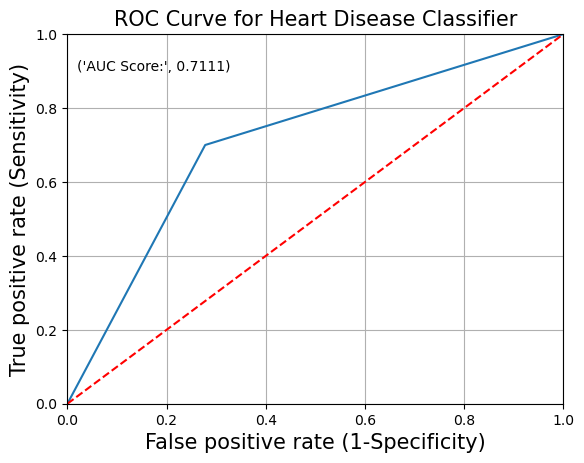

In [34]:
plot_roc(decision_tree_model)
# The plot looks straight because the prediction = y-hat is either zero or one as we let the tree grow indefinitely.
# We didn't set any stopping criteria

* **The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)**

* **We see our classifier (decision tree) to be away from the dotted line with the AUC score 0.7105**

In [40]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree' as model name to the function
update_score_card(model_name = 'Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.711111,0.777778,0.7,0.709302,0.414169,0.736842


Prune the Decision Tree

Pruning reduces the size of the decision tree by removing the internal nodes of the tree. It decreases the complexity of the tree, and so improves the accuracy of prediction. It is useful because trees may fit the training data well, but may do a poor prediction on test data. A simpler tree often avoids over-fitting.

In [41]:
# pass the 'random_state' to obtain the same samples for each time you run the code
prune = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 25 , random_state = 10)

# fit the model using fit() on train data
decision_tree_prune = prune.fit(X_train, y_train)

Plotting the decision tree again after pruning

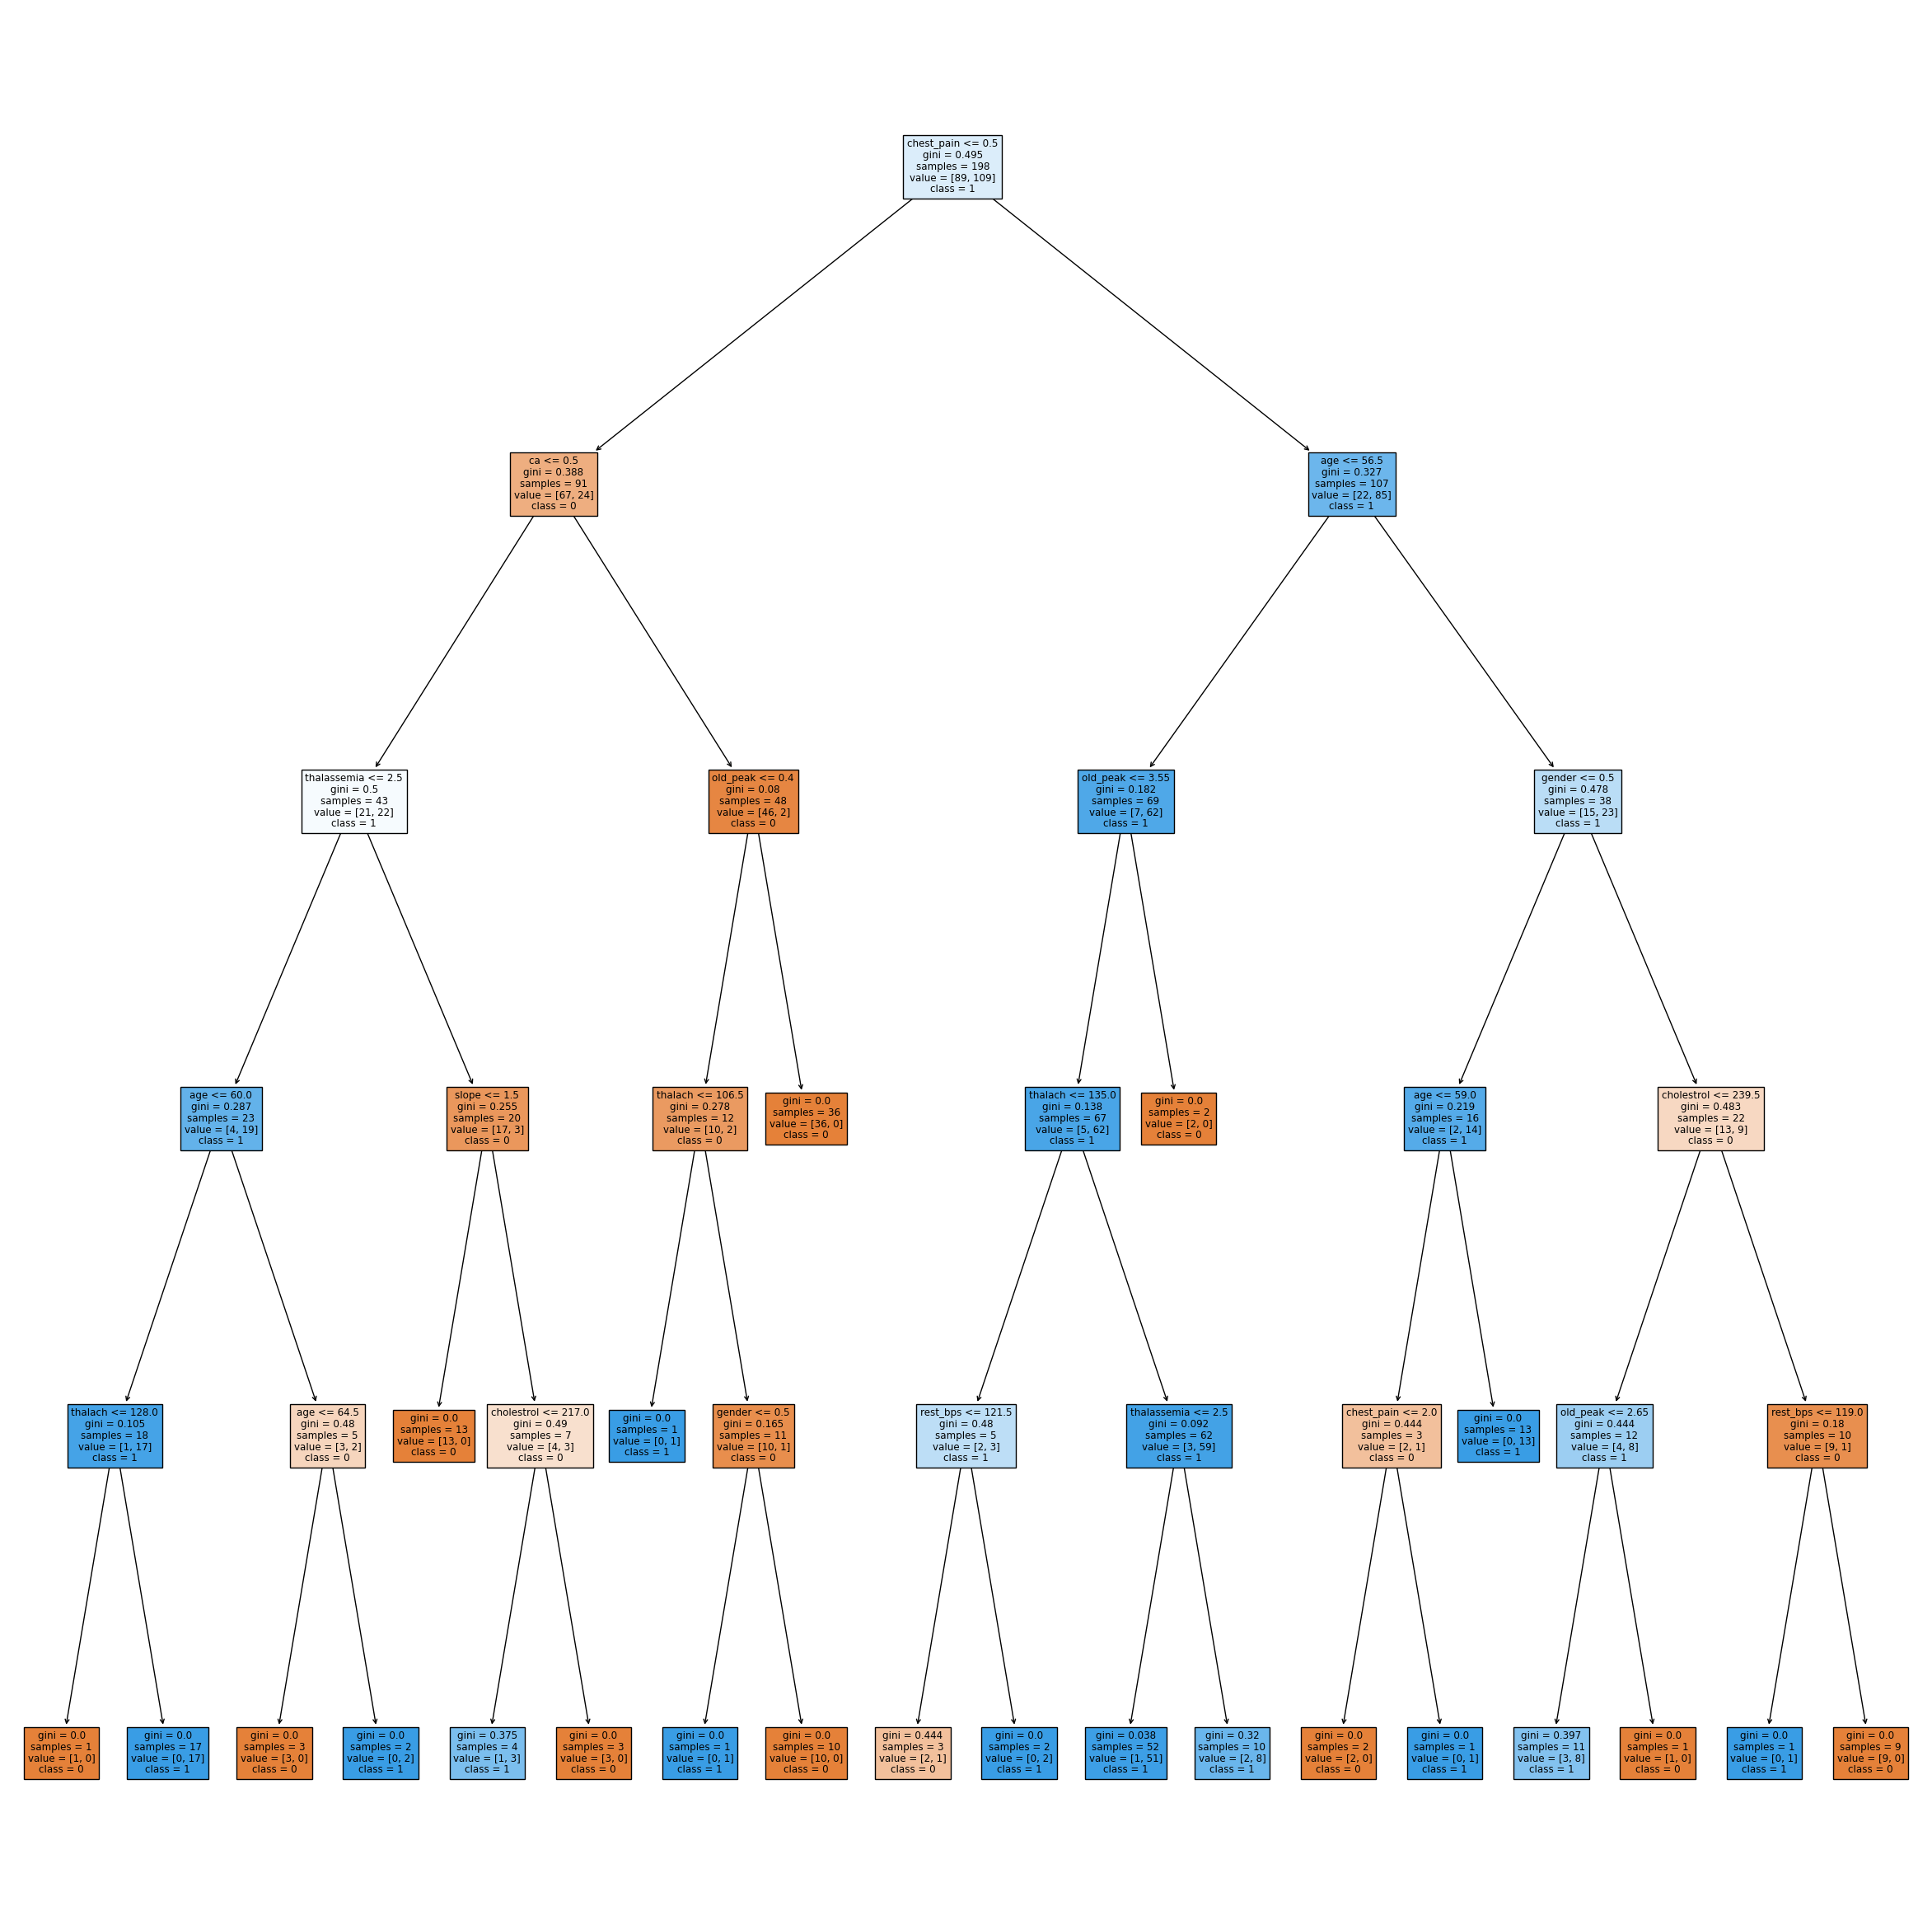

In [42]:
# save the column names in 'labels'
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_prune, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

In [43]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_prune.predict_proba(X_test)[:,1]

In [44]:
# predict the class labels using 'X_test'
y_pred = decision_tree_prune.predict(X_test)

In [45]:
from sklearn.metrics import *

dt_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {dt_accuracy:.4f}')

cm =confusion_matrix(y_test, y_pred)
print(f'Confusion_matrix: \n{cm}')

Accuracy: 0.7674
Confusion_matrix: 
[[27  9]
 [11 39]]


* **Interpretation: The accuracy is 76% for this model**

Again Plot the ROC curve.

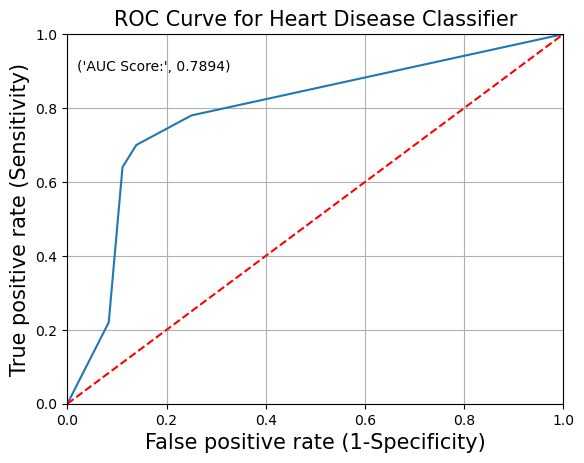

In [47]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree (pruned) model to the function
plot_roc(decision_tree_prune)

* **The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).**

* **We see our classifier (decision tree with pruning) to be away from the dotted line with the AUC score 0.7389**

In [52]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree (Pruned)' as model name to the function
update_score_card(model_name = 'Decision Tree (Pruned)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.711111,0.777778,0.70,0.709302,0.414169,0.736842
1,Decision Tree (Pruned),0.789444,0.812500,0.78,0.767442,0.525910,0.795918


Decision Tree (using GridSearchCV)

Use GridSearch to obtain the optimal values of hyperparameters



In [58]:
from sklearn.model_selection import GridSearchCV

decision_tree_classification = DecisionTreeClassifier(random_state = 10)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [5, 10, 15, 20, 25]
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=decision_tree_classification, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', dt_grid.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_samples_split': 2} 



Build the model using the hyperparameters obtained in the above step 

In [59]:
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_grid_model = DecisionTreeClassifier(criterion = dt_grid.best_params_.get('criterion'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(X_train, y_train)

Plot the decision tree again

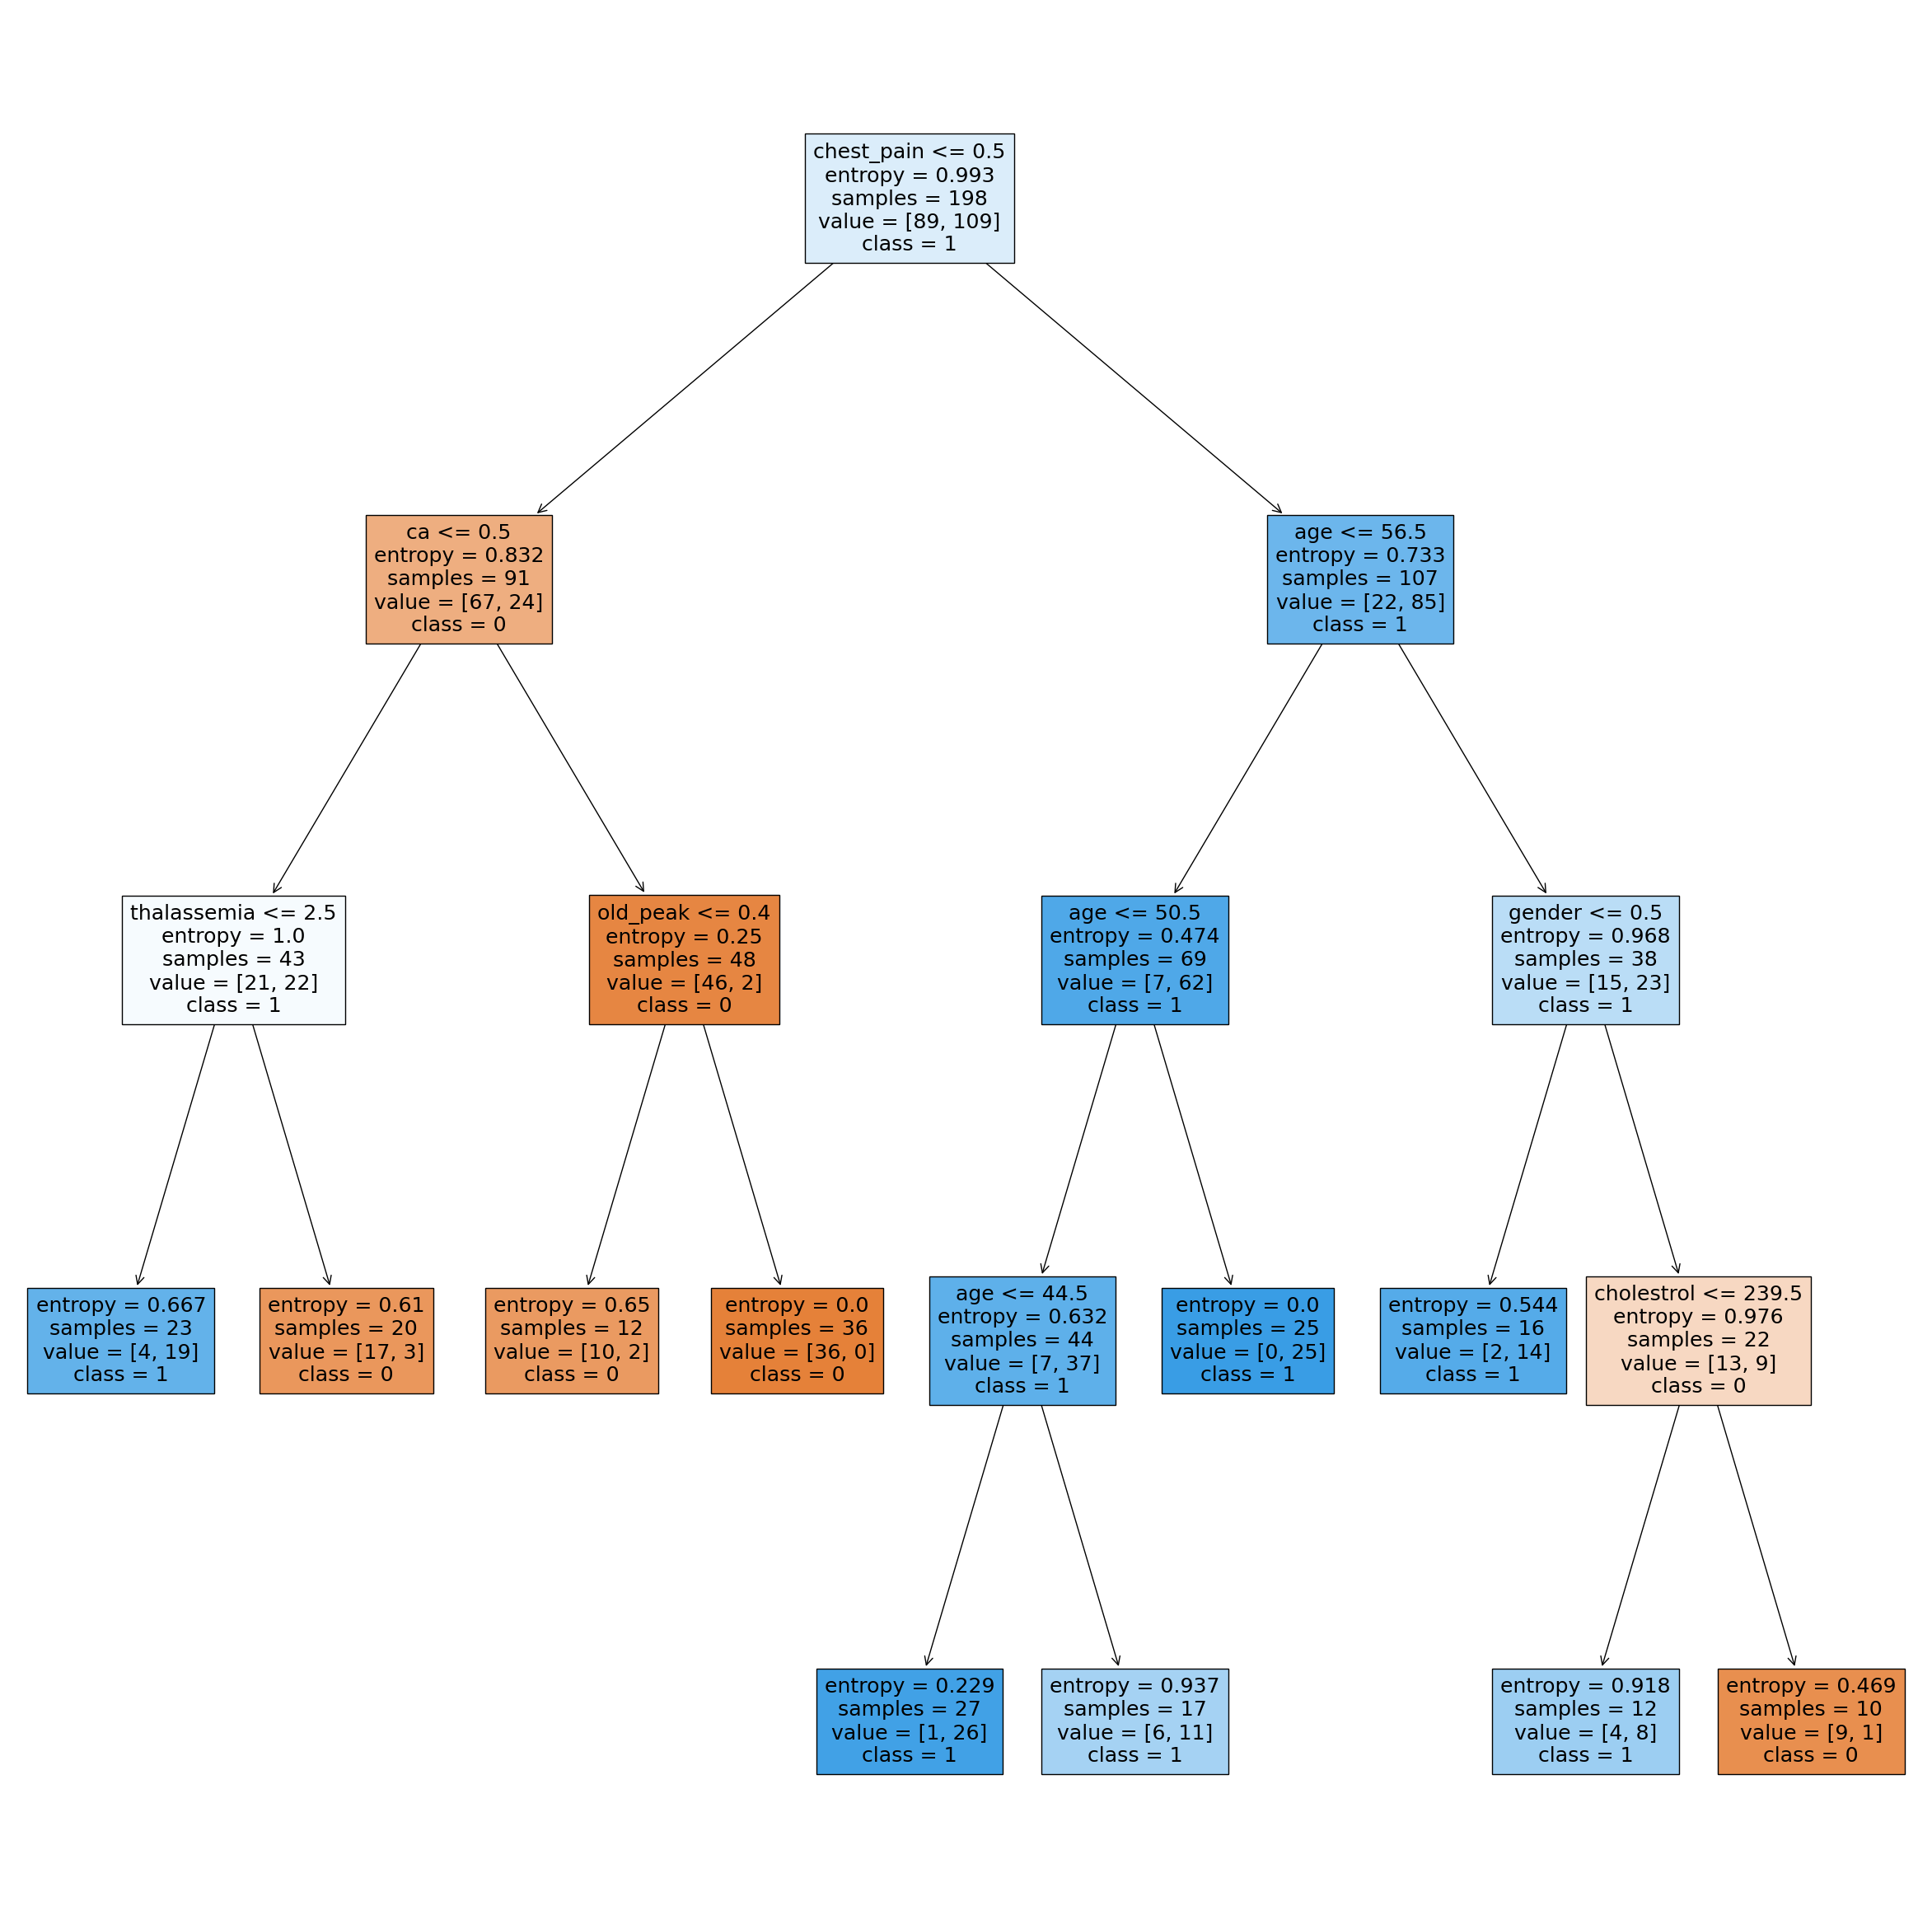

In [60]:
# save the column names in 'labels'
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_grid_model, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

In [61]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = dt_grid_model.predict_proba(X_test)[:,1]

In [62]:
# predict the class labels using 'X_test'
y_pred = dt_grid_model.predict(X_test)

In [64]:
from sklearn.metrics import *

dt_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {dt_accuracy:.4f}')

cm =confusion_matrix(y_test, y_pred)
print(f'Confusion_matrix: \n{cm}')

Accuracy: 0.7907
Confusion_matrix: 
[[26 10]
 [ 8 42]]


Interpretation: The accuracy has increased to 79% for this model using decision tree (GridSearchCV) .

Plot the ROC curve

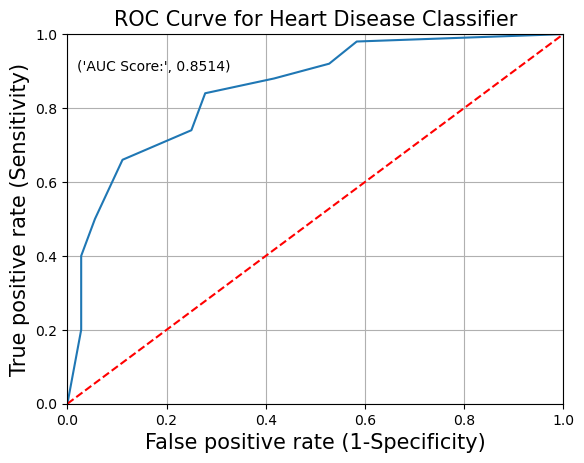

In [65]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree (GridSearchCV) model to the function
plot_roc(dt_grid_model)

* **The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)**

* **We see our classifier (decision tree with GridSearchCV) to be away from the dotted line with the AUC score 0.7543**

To take the final conclusion, let us print the result table.

In [66]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree (GridSearchCV)' as model name to the function
update_score_card(model_name = 'Decision Tree (GridSearchCV)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.711111,0.777778,0.70,0.709302,0.414169,0.736842
1,Decision Tree (Pruned),0.789444,0.812500,0.78,0.767442,0.525910,0.795918
2,Decision Tree (GridSearchCV),0.851389,0.807692,0.84,0.790698,0.566629,0.823529


* **The above table shows that the Decision Tree (GridSearchCV) has the highest values for most of the performance measures like AUC Score, Recall, f1-score, accuracy. Therefore, it can be concluded that the Decision Tree (GridSearchCV) can be used to predict the existence of heart disease in the patients. In future when we have more observations or bigger dataset and we can also apply ensemble techniques for prediction that can be tested again**